In [1]:
!pip install sklearn

Looking in indexes: https://pypi.douban.com/simple


In [98]:
%matplotlib inline

In [99]:
import numpy as np

In [100]:
random_data = np.random.random((20, 2))

In [101]:
random_data

array([[0.13200672, 0.24876491],
       [0.93815286, 0.36344903],
       [0.7125189 , 0.23848774],
       [0.57360391, 0.89218505],
       [0.83716195, 0.89436479],
       [0.89808009, 0.0276003 ],
       [0.45570927, 0.19746088],
       [0.85765408, 0.37982403],
       [0.73577661, 0.14176242],
       [0.5667921 , 0.28752398],
       [0.83067612, 0.91492219],
       [0.29525753, 0.35022818],
       [0.83656548, 0.40077911],
       [0.36154301, 0.55294674],
       [0.2547744 , 0.37424142],
       [0.28694791, 0.5297451 ],
       [0.9057138 , 0.18755174],
       [0.29667091, 0.31230581],
       [0.03880512, 0.31215513],
       [0.98421079, 0.18647566]])

In [102]:
import matplotlib.pyplot as plt

In [103]:
X = random_data[:, 0]

In [104]:
y = random_data[:, 1]

In [105]:
import random

In [106]:
def assmuing_function(x):
    # 在我们的日常生活中是常见的
    # 体重 -> 高血压的概率
    # 收入 -> 买阿玛尼的概率
    # 其实都是一种潜在的函数关系 + 一个随机变化
    return 13.4 * x + 5 + random.randint(-5, 5)

In [107]:
y = [assmuing_function(x) for x in X]

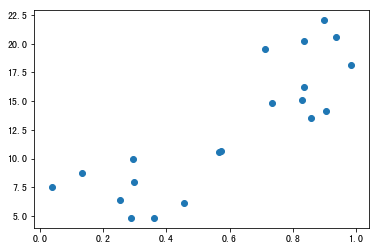

In [109]:
plt.scatter(X, y)

In [110]:
y = np.array(y)

In [111]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [112]:
reg = LinearRegression().fit(X.reshape(-1, 1), y)

In [113]:
reg.score(X.reshape(-1, 1), y)

0.7123580942322888

In [114]:
reg.coef_

array([15.69467916])

In [115]:
reg.intercept_

3.3462974493389037

In [116]:
def f(x): 
    return reg.coef_ * x + reg.intercept_

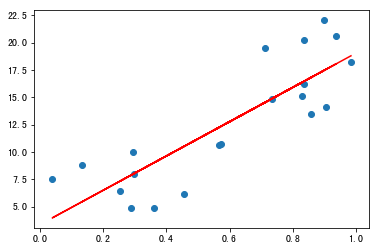

In [117]:
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

In [121]:
X

array([0.13200672, 0.93815286, 0.7125189 , 0.57360391, 0.83716195,
       0.89808009, 0.45570927, 0.85765408, 0.73577661, 0.5667921 ,
       0.83067612, 0.29525753, 0.83656548, 0.36154301, 0.2547744 ,
       0.28694791, 0.9057138 , 0.29667091, 0.03880512, 0.98421079])

In [122]:
reg.predict([[1.1]])

array([20.61044453])

# How to implement a KNN model

In [123]:
def model(X, y):
    # 直接存储 X,y 即可
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [124]:
from scipy.spatial.distance import cosine

In [125]:
def distance(x1, x2):
    return cosine(x1, x2)

In [126]:
def predict(x, k=5):
    # 在predicate的时候，需要做大量的计算
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    
    # -> regression: numerical -> most_similars (y)
    # -> classification: categorical -> most_similar (y)
    
    # 已经获得了最相似的数据集
    # 然后呢，Counter() -> most_common() -> 就可以获得出现最多的这个y了 
    

## NOT简简单单的学一个算法，看到背后的思维方式：

> 贝叶斯，线性回归，决策树，KNN

## 新的问题，是不存在现成的解决方案的，但是呢，我们可以依据前人比较成熟的思维方法，我们发明新的方法。

## How to implement a Decision Tree

In [3]:
from collections import Counter

## 信息熵

$$ Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i)) $$

In [27]:
from icecream import ic

In [42]:
def entropy(elements):
    '''群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [36]:
entropy([1, 1, 1, 1])

ic| probs: [1.0]


-0.0

In [37]:
entropy([1, 1, 1, 0])

ic| probs: [0.25, 0.75]


0.5623351446188083

In [38]:
entropy([2, 3, 3, 3])

ic| probs: [0.25, 0.75]


0.5623351446188083

In [39]:
entropy([2, 3, 3, 4])

ic| probs: [0.25, 0.5, 0.25]


1.0397207708399179

In [40]:
entropy([1, 2, 2, 3])

ic| probs: [0.25, 0.5, 0.25]


1.0397207708399179

In [41]:
entropy([1, 2, 3, 4])

ic| probs: [0.25, 0.25, 0.25, 0.25]


1.3862943611198906

## 决策树怎么来决定，哪一个特征来进行分割呢？ 

In [91]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [44]:
import pandas as pd

In [92]:
dataset = pd.DataFrame.from_dict(mock_data)

In [93]:
dataset

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
2,F,+10,2,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0
6,M,-10,2,1,1


In [49]:
# split_by_gender: 
print(entropy([1, 1, 1, 0]) + entropy([0, 0, 1]))

# split_by_income:
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_family_number
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_some_feature: 
entropy([1, 1, 1, 1]) + entropy([0, 0, 0])

ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]


1.198849312913621
0.6730116670092565
0.6730116670092565


ic| probs: [1.0]
ic| probs: [1.0]


-0.0

## 决策树在选择决策过程，决策顺序的时候，其实是按照，根据这个特征，进行分割之后，数据的熵最少原则进行的。

In [50]:
set(mock_data['family_number'])

{1, 2}

In [68]:
set(mock_data['gender'])

{'F', 'M'}

In [52]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()

In [53]:
sub_split_1

[1, 1, 0, 0, 0]

In [55]:
sub_split_2

[1, 1]

In [54]:
sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()

In [56]:
entropy(sub_split_1) + entropy(sub_split_2)

ic| probs: [0.6, 0.4]
ic| probs: [1.0]


0.6730116670092565

In [57]:
_sub_split_2 = dataset[dataset['gender'] != 'M']['bought'].tolist()

In [58]:
_sub_split_1 = dataset[dataset['gender'] != 'F']['bought'].tolist()

In [59]:
_sub_split_1

[0, 0, 1]

In [60]:
_sub_split_2

[1, 1, 1, 0]

In [63]:
entropy(_sub_split_1) + entropy(_sub_split_2)

ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.25, 0.75]


1.198849312913621

In [64]:
entropy(sub_split_1) + entropy(sub_split_2)

ic| probs: [0.6, 0.4]
ic| probs: [1.0]


0.6730116670092565

In [67]:
set(dataset.columns.tolist()) - {'bought'}

{'family_number', 'gender', 'income'}

In [94]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_split_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_split_2)
            
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [95]:
find_the_optimal_spilter(training_data=dataset, target='bought')

ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| pro

spliter is: ('pet', 1)
the min entropy is: -0.0


('pet', 1)

In [71]:
dataset[dataset['family_number'] == 2]

,gender,income,family_number,bought
2,F,+10,2,1
6,M,-10,2,1


In [72]:
dataset[dataset['family_number'] == 1]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [73]:
find_the_optimal_spilter(dataset[dataset['family_number'] == 1], 'bought')

ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| probs: [0.75, 0.25]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128
ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116

spliter is: ('income', '+10')
the min entropy is: 0.5623351446188083


('income', '+10')

In [84]:
fm_n_1 = dataset[dataset['family_number'] == 1]

In [85]:
fm_n_1[fm_n_1['income'] == '+10']

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [87]:
# split_gender 
print(entropy([1, 0]) + entropy([0, 0]))

# split_family_number
print(entropy([1, 0, 0, 0]))

ic| probs: [0.5, 0.5]
ic| probs: [1.0]
ic| probs: [0.75, 0.25]


0.6931471805599453
0.5623351446188083


In [86]:
fm_n_1[fm_n_1['income'] != '+10']

,gender,income,family_number,bought
1,F,-10,1,1


In [88]:
fm_n_1[fm_n_1['income'] == '+10']

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [89]:
find_the_optimal_spilter(fm_n_1[fm_n_1['income'] == '+10'], 'bought')

ic| f: 'income'
ic| values: {'+10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1, 1]
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| probs: [0.5, 0.5]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 0.6931471805599453
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.5, 0.5]
ic| entropy_1: 0.6931471805599453
ic| sub_split_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6931471805599453
ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1, 1]
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083


spliter is: ('family_number', 1)
the min entropy is: 0.5623351446188083


('family_number', 1)

## 到这一步就无法分割了

## A simple example of kmeans

In [127]:
from sklearn.cluster import KMeans

In [131]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]

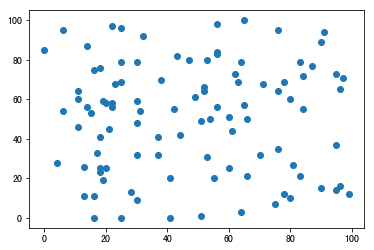

In [132]:
plt.scatter(X1, X2)

In [133]:
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]

In [134]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [135]:
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [136]:
cluster.cluster_centers_

array([[24.27777778, 17.11111111],
       [53.        , 51.21428571],
       [19.35294118, 55.76470588],
       [78.9375    , 19.1875    ],
       [75.59090909, 77.13636364],
       [24.30769231, 84.07692308]])

In [137]:
cluster.labels_

array([1, 0, 3, 1, 0, 3, 1, 0, 4, 4, 1, 0, 5, 4, 4, 3, 4, 0, 3, 1, 4, 2,
       2, 4, 2, 0, 3, 0, 4, 4, 2, 1, 2, 3, 0, 5, 3, 1, 2, 5, 2, 0, 4, 5,
       5, 1, 4, 0, 5, 3, 1, 0, 4, 1, 2, 0, 2, 4, 0, 4, 5, 3, 3, 3, 4, 2,
       4, 3, 5, 3, 5, 4, 4, 2, 0, 4, 1, 3, 0, 2, 3, 1, 4, 5, 5, 2, 1, 0,
       4, 0, 5, 5, 0, 3, 1, 2, 4, 2, 2, 2], dtype=int32)

In [138]:
from collections import defaultdict

In [139]:
centers = defaultdict(list)

In [140]:
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

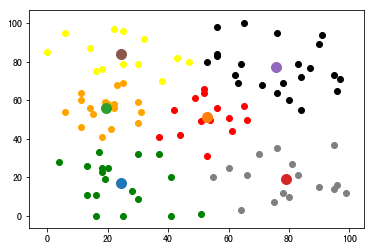

In [141]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Kmeans的计算负责度

In [142]:
def distance(): return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

$$ O(I * N * k * d) $$

N: 10000
k: 100
d: 500
I: 500
-> 10**(5 + 2 + 2 + 2) => 10^11 => 100个亿